<a href="https://colab.research.google.com/github/Introducao-Series-Temporais-em-Python/Book/blob/main/Cap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução às Séries Temporais** 

___


Neste capítulo você vai aprender sobre:

* Os principais conceitos e aplicações das Séries Temporais 
* A decomposição de Séries Temporais em Tendência, Ciclos, Sazonalidade e Resíduos e como isso pode ser empregado para previsões
* e os primeiros passos de como empregar o `Python` para suas análises de Séries Temporais

A maior parte dos conceitos apresentados aqui serão empregados ao longo de todo o texto. A abordagem aqui é mais conceitual e muitas vezes vamos realizar operações sobre os dados apenas com o objetivo de explorar um conceito, como por exemplo a decomposição de séries. Por isso também, neste capítulo, há uma grande parte de códigos omitidos no texto impresso, mas que você poderá acessar no TSP Book Site. Você não precisa, assim, se preocupar com detalhes de muitos dos códigos deste capítulo, o que você poderá rever mais adiante no texto.

---




Séries Temporais desempenham um papel importante no nosso dia a dia. Fenômenos físicos, transações de negócios e dispositivos eletrônicos produzem constantemente dados ao longo do tempo. Esses dados podem ser, assim, empregados para previsões, análises etc. Neste capítulo você vai entender o que caracteriza esses dados que conhecemos como Séries Temporais, como eles podem ser descompostos em dados mais simples para análise e como empregar o `Python` para você iniciar a sua manipulação.




In [ ]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [ ]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [ ]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

In [ ]:
#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)



In [ ]:
#@markdown `tspdecompose()`
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

# Séries Temporais

> **Uma *Série Temporal* é uma sequência de observações registradas em intervalos de tempo regulares.**

Essas observações são *medidas* tomadas ou encontradas a tempos regulares. Você certamente já encontrou dados como: 

* Os valores anuais do PIB
* Os preços diários de ações e commodities 
* Volume horário de transações de cartões crédito
* Faturamento ou volume vendas mensais de um negócio 
* Quantidade de *hits* diários em página Web ou site
* A quantidade de emissões de CO2 ou o aumento de temperatura anuais no mundo

Todos são dados muito comuns e medidos a intervalos regulares, hora a hora, diários, mensais etc. havendo séries ainda com intervalos muito curtos, de segundos ou milisegundos, como séries encontradas na física e na biomedicina, e séries com intervalos muito longos, de décadas  ou  mais, encontradas na astronomia e geologia. Aqui você encontrará a maior parte dos exemplos empregando séries mais comuns, como séries diárias a mensais, mas os mesmos procedimentos são igualmente aplicáveis a qualquer série.






 



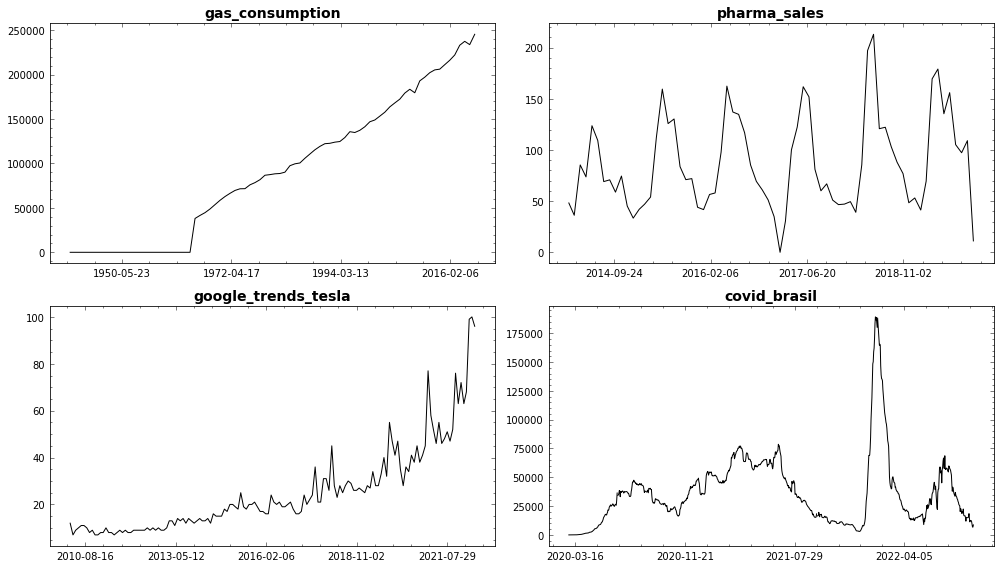

In [ ]:
#@markdown  
datasets = pd.read_csv(path + 'datasets.csv', index_col=0) 

fig, ax = plt.subplots(2,2,figsize=(14,8))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

for i, axis in enumerate(fig.axes):
  df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
  tspplot(df[ df.columns[0] ],title=show_files[i].split('.csv')[0],ax=axis,nr_xticks=5)



**Figura 1. Exemplos de Séries Temporais. Gas Consumption: Evolução do Consumo de Gás para a geração de energia elétrica no mundo; Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico; Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google; Covid Brasil:  Número ajustado de novos casos de COVID no Brasil.**

In [ ]:
#@markdown Descrição
for fname in show_files:
  print(datasets[ datasets.file_name == fname ]['name'].values[0] + ':  ' +
          datasets[ datasets.file_name == fname ]['short_description'].values[0])

Gas Consumption:  Evolução do Consumo de Gás para a geração de energia elétrica no mundo
Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico
Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google
Covid Brasil:  Número ajustado de novos casos de COVID no Brasil


Diferentes tarefas podem ser aplicadas a uma Série Temporal, e de acordo com o seu objetivo você pode estar interessado em:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da Série
1. Descrever o comportamento da Série 
1. Procurar periodicidades relevantes
1. Identificar Anomalias
1. Simular a Série de Dados

Certamente, fazer previsões de valores futuros é o mais comum e neste livro nos deteremos principalmente nos conceitos e ferramentas para esta tarefa, para a qual existem várias abordagens que podemos empregar. 

Em todos os casos a ideia é criar um *modelo probabilístico* da série. Um modelo é sempre uma simplificação, que se pretende útil para análise. Neste livro trataremos unicamente de modelos que são baseados no *domínio do tempo*, como os modelos AR, MA, ARIMA e SARIMAX, e que são em geral mais empregados. Empregar o *domínio do tempo* significa que modelamos os valores das séries em função da *variável* tempo, ou de seus valores no tempo. Outros modelos, como a Análise de Fourier e Análise Espectral, empregam o *domínio da frequência* para modelar séries de dados, e há ainda modelos de *Espaço de Estados*, dentre outros. Modelos no domínio do tempo são *modelos paramétricos* pois são empregados um número finito de parâmetros. Modelos no *domínio da frequência* são modelos *não paramétricos* e encontram maior aplicação em campos como a física e a astronomia. Por último, vamos nos limitar a modelos que empregam unicamente procedimentos estatísticos sobre os dados e que têm aplicação geral em qualquer campo, diferentemente de modelos que empregam uma *teoria* subjacente, como os modelos econômicos utilizados em  *econometria*. 



# Decomposição de Séries Temporais

A ideia de construir um modelo é a de criarmos uma simplificação útil dos dados. No caso de Séries Temporais o modelo de Decomposição de uma Série em Séries de Dados mais simples é o procedimento clássico.

Em geral decompomos uma Série Temporal em componentes onde cada componente busca modelar um tipo de padrão ou comportamento da série. Na maior parte das vezes você pode encontrar esses componentes em uma série de dados:

* **Tendência**
* **Sazonalidade**
* **Resíduos**

A **tendência** representa o comportamento da série no longo prazo, o aumento ou diminuição de longo prazo nos dados o que pode se dar de forma linear ou não, como o crescimento da temperatura global ano a ano. A componente **sazonalidade** representa o padrão sazonal da série como mudanças que ocorrem com alguma periodicidade ao longo do tempo. É o caso dos acréscimos e decréscimos de temperatura que ocorrem ao longo das estações do ano, independentemente da elevação das temperaturas no longo prazo. Por último, os **resíduos** constituem a parte que sobra das mudanças e uma que em geral não sabemos explicar. É a componente estocástica, ou de modo informal, *aleatória*. Eles explicam, por exemplo, às diferenças de temperatura entre dois dias consecutivos da mesma estação causadas por inúmeros fatores que podem ir da maior presença de nuvens e de raios solares, ao período do ciclo lunar naqueles dias. Você também pode encontrar essa componente sendo denominada de *erro aleatório* ou ainda *ruído branco*. 

Em geral, combinamos a tendência com uma outra componente das séries denominada **ciclo**, mas por simplicidade denominamos unicamente de tendência. 

> **Sazonalidade $\times$ Ciclos. Ciclos e mudanças sazonais são comportamentos bem diferentes nas séries temporais. A sazonalidade é um comportamento recorrente que se repete a intervalos fixos, regulares (a maior temperatura em certas estações do ano, o maior número de visitas em um site de entretenimento aos finais de semana). Já os ciclos são comportamentos recorrentes mas que ocorrem a intervalos não regulares. Vulcões e terremotos, por exemplo, têm um comportamento recorrente, mas não sabemos quando irão ocorrer, e uma série que represente as temperaturas ou o tremor em torno da cratera do Vulcão [Eyjafjallajökull](https://pt.wikipedia.org/wiki/Eyjafjallaj%C3%B6kull) apresentará comportamentos repetitivos, mas que não são sazonais por não ter uma periodicidade regular. O mesmo ocorre com as crises econômicas. Elas impõem ciclos econômicos que alternam recessão e crescimento, mas não sabemos quando irá ocorrer a próxima crise do petróleo ou próximo estouro da *bolha* de um determinado setor.** 

 



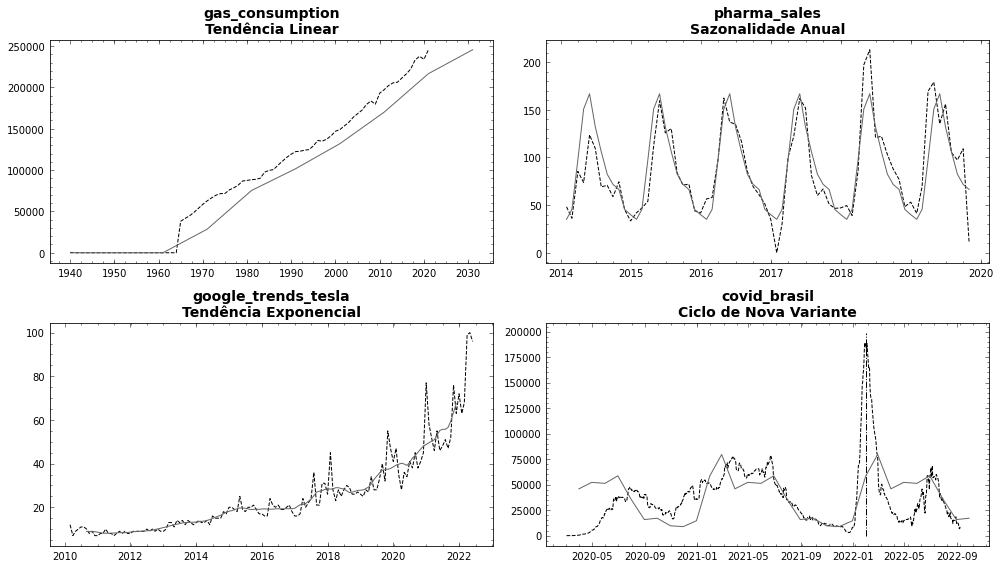

In [ ]:
#@markdown  
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(2,2,figsize=(14,8))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

i = 0
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

tspplot(df[[ df.columns[0] ]], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.trend.resample('10Y').mean(), title=show_files[i].split('.csv')[0] + '\nTendência Linear', ax=fig.axes[i])

i = 1
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

tspplot(df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.seasonal + df[ df.columns[0] ].mean(), title=show_files[i].split('.csv')[0] + '\nSazonalidade Anual', ax=fig.axes[i])

i = 2
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)
decomp = seasonal_decompose(df)

tspplot(df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.trend, title=show_files[i].split('.csv')[0] + '\nTendência Exponencial', ax=fig.axes[i])

# fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

i = 3
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df2 = df.dropna()
df2 = df2.resample('M').mean()
df2.index = pd.to_datetime(df2.index)
decomp = seasonal_decompose(df2)

from datetime import datetime as dt
df2 = df2[df2.index >= dt.strptime('1940', '%Y')]

tspplot(df[[ df.columns[0] ]], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.seasonal + df[ df.columns[0] ].mean(), title=show_files[i].split('.csv')[0] + '\nCiclo de Nova Variante', ax=fig.axes[i])
plt.vlines(dt.strptime('2022-02-01', '%Y-%m-%d'), 0, 199000,linestyle='dashdot',label='Início variante')

plt.tight_layout()
plt.show()

**Figura 2. Tendência, Sazonalidade e Ciclos. Nas Séries do exemplo anterior você pode observar algumas dessas componentes.  Gas Consumption: apresenta uma tendência bastante linear; Pharma Sales:  não há uma tendência de crescimento ou decréscimo, mas há um padrão recorrente de evolução dos dados que se repete anualmente; Google Trends Tesla: também apresenta sazonalidade mas destacamos no gráfico a tendência exponencial das buscas; Covid Brasil: aqui você encontrar a componente sazonal, mas também destacamos o início de um novo ciclo da doença com o surgimento da variante Omicron do vírus Covid-19.**

Você mesmo pode pensar em vários exemplos de cada um desses comportamentos das |Séries. Esses comportamentos não aparecem obrigatoriamente em todas as séries e uma série temporal, por exemplo, pode apresentar uma certa tendência, mas não um comportamento sazonal.

A função a seguir emprega o pacote `statsmodel` e nossa função `tspdecompose()` (a função `seasonal_decompose()` customizada que você encontra no *Quick Start*)  para decompor uma série em suas componentes de tendência, sazonalidade e resíduos e você pode observar os resultados abaixo para a série exemplo de dados do Google Trends para a busca do termo 'Tesla'. 

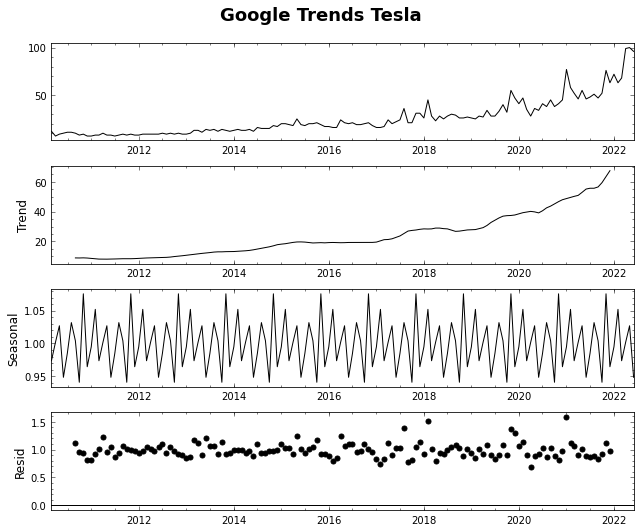

In [ ]:
df = pd.read_csv(path + 'google_trends_tesla.csv', index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)

tspdecompose(df, title='Google Trends Tesla', model='multiplicative')

## Séries Temporais Aditivas e Multiplicativas

Dependendo da natureza da série as componentes de tendência, sazonalidade e resíduos podem ser combinadas de duas formas: 

* **Série Aditiva $=$ Tendência $+$  Sazonalidade $+$ Resíduos**

* **Série Multiplicativa $=$ Tendência $\times$  Sazonalidade $\times$ Resíduos**

Ou, seguindo a notação que empregaremos daqui em diante:

$$ Y_t = T_t + S_t + R_t $$

para modelos aditivos, e:

$$ Y_t = T_t \times S_t \times R_t $$

para modelos multiplicativos.



> **Idealmente você pode ter em mente que séries aditivas apresentam valores que, embora apresentem variações, têm uma variação limitada ao longo do tempo. Já séries multiplicativas, em geral, apresentam um comportamento explosivo, ou exponencial.**

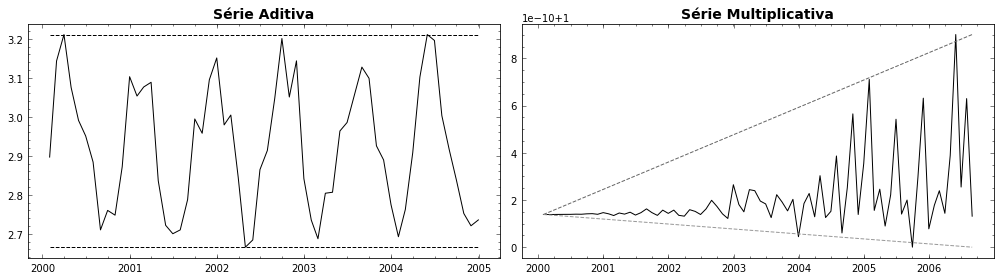

In [ ]:
#@markdown 
df1 = tspsimulate(nr_months=60, beta_1=0, seasons_month_len=10, noise=0.2, model='additive', show_plot=False)
df2 = tspsimulate(nr_months=80, beta_1=-2, alpha=0.2, seasons_month_len=1, noise=0.1, model='multiplicative', show_plot=False)
fig, ax = plt.subplots(1,2,figsize=(14,4))

tspplot(df1[['Y']],title='Série Aditiva',ax=ax[0])
ax[0].hlines(df1.Y.min(), df1.index.min(), df1.index.max(), linestyle='--')
ax[0].hlines(df1.Y.max(), df1.index.min(), df1.index.max(), linestyle='--')

tspplot(df2[['Y']],title='Série Multiplicativa',ax=ax[1])
ax[1].plot([df2.index.min(), df2.index.max()], [df2.Y[ df1.index.min() ], df2.Y.max()], linestyle='--')
ax[1].plot([df2.index.min(), df2.index.max()], [df2.Y[ df1.index.min() ], df2.Y.min()], linestyle='--')

plt.tight_layout()
plt.show()


Nem sempre é muito simples identificar se uma série é aditiva ou multiplicativa e, na prática, em geral, avaliam-se os dois modelos escolhendo-se o que melhor se ajusta aos dados.

> **Lembre-se que estamos criando modelos e os modelos são sempre simplificações, hipóteses úteis que fazemos para análises e previsões. Ninguém informou aos usuários do Google que suas tendências e sazonalidades de buscas precisam ser somadas ou multiplicadas, e pode mesmo não haver uma forma de combinar essas componentes. Mas observamos que a multiplicação *funciona* e aproxima melhor a série, sendo portanto útil. E esta é a ideia de empregarmos modelos.**

# Construindo uma Série Temporal

A simulação de séries temporais tem um papel importante em muitas aplicações no campo das engenharias, da física e séries climáticas. Mas aqui o nosso propósito é mais modesto e trata-se apenas de fornecer uma ferramenta para você construir e explorar diferentes séries de dados e suas decomposições.

Uma forma comum de se pensar a componente tendência é aplicar uma função linear ou polinomial de grau maior, mas também são empregadas funções exponenciais e equações de diferenças. Já para a componente sazonal, funções periódicas como $sin$ ou $cos$, ou ainda funções *dummy* (que atribuem um valor para cada um dos períodos), são geralmente empregadas. O resíduo, então, pode ser adicionado por uma componente aleatória, ou ruído. Assim, se você considerar um modelo aditivo,

$$ Y_t = T_t + S_t + R_t $$

E pensar, dentre outros modelos possíveis, em modelo como: 

$$ Y_t = (\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3) + \alpha (\frac{ 2 \pi }{ k } \sin t) + \text{noise} \text{(1)}$$ 

$(\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3)$  corresponde a componente $T_t$, $\alpha (\frac{ 2 \pi }{ k } \sin t )$ a componente $S_t$,  e $\text{noise}$ é o resíduo $ R_t $. Isso modela uma Série Temporal aditiva arbitrária, e polinômios de grau maior e funções periódicas mais complexas poderiam ser empregadas para criar muitos outros modelos.

O modelo definido em $\text{(1)}$ é implementado a seguir. O código dessa função permite ainda você criar muitos outros modelos de séries de dados mensais, aditivas e multiplicativas, com diferentes periodicidades. Os parâmetros $\beta_n$ fornecem os coeficientes do polinômio de grau 3 e `seasons_month_len` ($k$) permite modelar o tamanho em meses do período sazonal. O parâmetro $\alpha$ fornece uma escala para a componente sazonal em termos de um percentual dos valores de tendência. O ruído é um valor aleatório com distribuição normal. Acesse o código no **TPS Book Site** e experimente construir outras séries de dados a partir da definição de suas componentes.






In [ ]:
#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)



In [ ]:
tspsimulate_ts

interactive(children=(IntSlider(value=60, description='nr_months', max=120, min=40), IntSlider(value=1, descri…

A função também retorna um dataframe `ts1` com os valores de cada componente produzidos.

In [ ]:
ts1.head()

,t,Y,T,S,R
2000-01-31,0,19.205942,1,0.000000,10.357335
2000-02-29,1,20.151127,3,7.053423,2.249097
2000-03-31,2,24.918454,5,11.412678,0.657170
2000-04-30,3,31.319177,7,11.412678,5.057892
2000-05-31,4,30.563283,9,7.053423,6.661253


Como você pode notar experimentando criar suas próprias séries de dados ou ainda observando as séries produzidas abaixo com diferentes parâmetros, nosso modelo, embora simples, parece ser útil para simular uma boa quantidade de diferentes séries de dados. Por isso é que empregamos modelos como esses. Mesmo simples, eles podem modelar uma grande variedade de fenômenos temporais e a maior parte dos modelos consiste em variações dessa abordagem. 

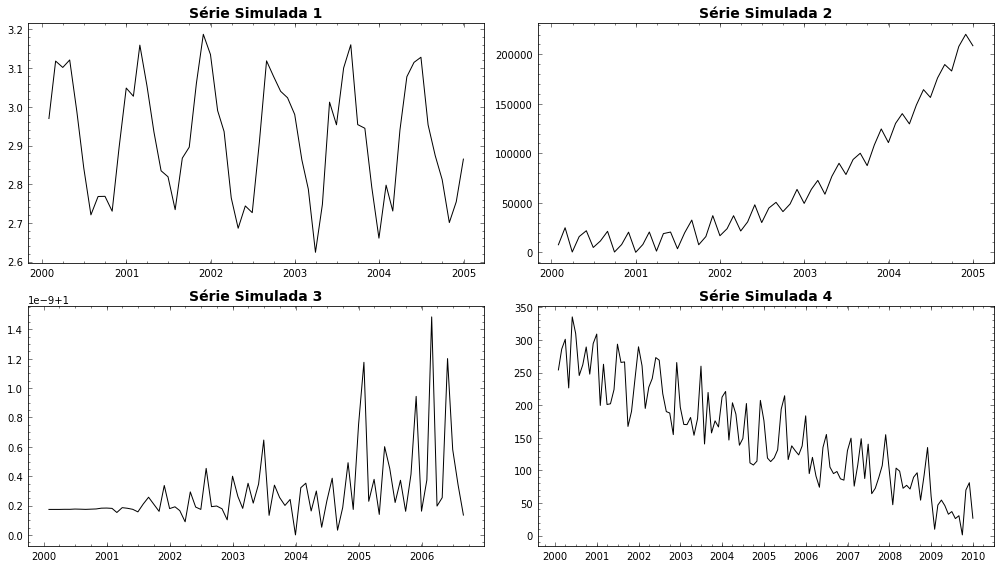

In [ ]:
df1 = tspsimulate(nr_months=60, beta_1=0, seasons_month_len=10, noise=0.2, model='additive', show_plot=False)
df2 = tspsimulate(nr_months=60, beta_1=-1, beta_2=2, beta_3=1, seasons_month_len=3, noise=0.2, model='additive', show_plot=False)
df3 = tspsimulate(nr_months=80, beta_1=-2, alpha=0.2, seasons_month_len=1, noise=0.2, model='multiplicative', show_plot=False)
df4 = tspsimulate(nr_months=120, beta_1=-2, seasons_month_len=6, noise=0.9, model='additive', show_plot=False)

fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1[['Y']],title='Série Simulada 1',ax=ax[0,0])
tspplot(df2[['Y']],title='Série Simulada 2',ax=ax[0,1])
tspplot(df3[['Y']],title='Série Simulada 3',ax=ax[1,0])
tspplot(df4[['Y']],title='Série Simulada 4',ax=ax[1,1])

# Estacionariedade  

Decompor uma série já nos traz informações bastante úteis, como a expectativa de seus valores futuros e incerteza, ou seus padrões sazonais. Mas na maior parte dos casos estamos interessados em fazer previsões mais assertivas de valores futuros. Para isso, a maior parte dos modelos assume que a série utilizada para previsão é uma *estacionária*. 

Ser estacionária, significa que as estatísticas da Série Temporal, como a média dos valores, a mediana e a variância não mudam significativamente ao longo. O problema é que a maior parte das séries não é estacionária, apresentando  algum tipo de tendência (ou mesmo ciclo).  





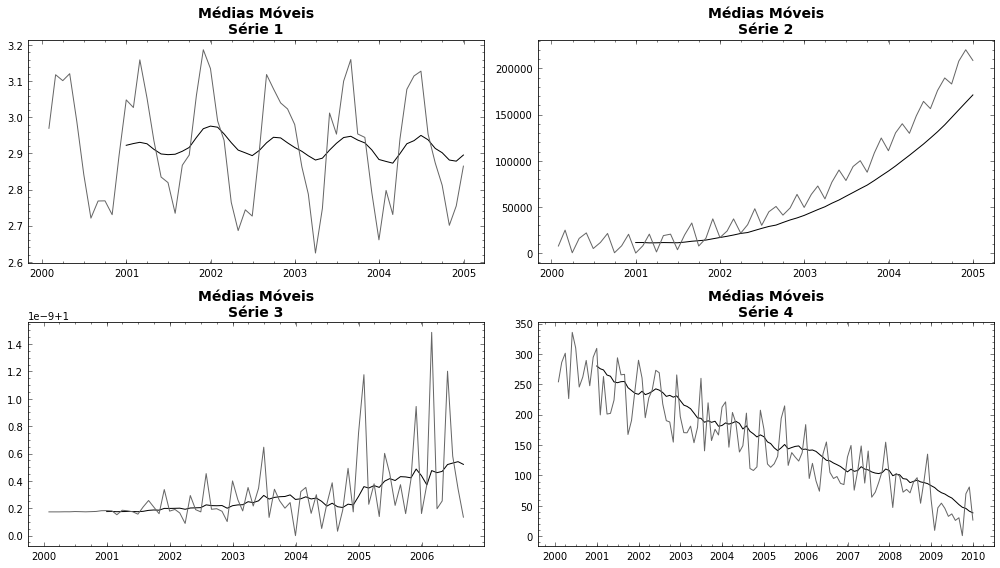

In [ ]:
#@markdown 
fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1.rolling(12).mean().Y ,title='Médias Móveis\nSérie 1', ax=ax[0,0])
tspplot(df1.Y , ax=ax[0,0])

tspplot(df2.rolling(12).mean().Y ,title='Médias Móveis\nSérie 2', ax=ax[0,1])
tspplot(df2.Y , ax=ax[0,1])

tspplot(df3.rolling(12).mean().Y ,title='Médias Móveis\nSérie 3', ax=ax[1,0])
tspplot(df3.Y , ax=ax[1,0])

tspplot(df4.rolling(12).mean().Y ,title='Médias Móveis\nSérie 4', ax=ax[1,1])
tspplot(df4.Y , ax=ax[1,1])




Por exemplo, das séries simuladas ateriormente, apenas a Série Simulada 1 apresenta uma média dos valores a intervalos de 12 meses (*média móvel*) dentro de um intervalo pequeno de $[1.0, 1.14]$. De fato, você pode observar que essa é a única série produzida com a componente tendência igual a uma constante. Todas as demais apresentam a médias móveis de 12 meses com valores crescentes ou decrescentes.  E se você ainda tiver dúvidas sobre a Série Simulada 3, pode observar a seguir o desvio padrão ao longo do tempo das séries ao longo do tempo. Aqui empregamos valores normalizados (normalizados entre $[0,1]$) do desvio padrão. 

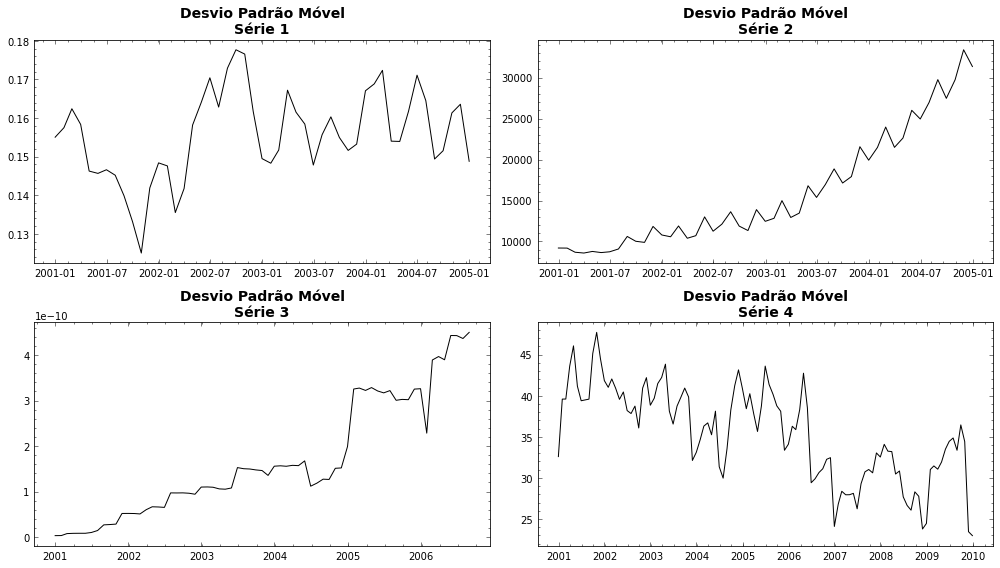

In [ ]:
#@markdown 
fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 1', ax=ax[0,0])
tspplot(df2.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 2', ax=ax[0,1])
tspplot(df3.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 3', ax=ax[1,0])
tspplot(df4.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 4', ax=ax[1,1])




Das séries do começo do nosso capítulo somente a série pharma_sales parece suficientemente estacionária. 

O procedimento geral consiste em fazermos *transformações* na série original (não estacionária) para obtermos uma série estacionária *derivada* a qual poderemos empregar para previsões e, então, voltarmos à série original. Em geral nos referimos a esse procedimento como *tornar a série estacionária*, embora, é claro, trata-se de criar uma nova série derivada. Nesse procedimento a a decomposição de séries tem um papel fundamental. 



# Tendências e Transformações

Duas transformações são particularmente úteis e geralmente empregadas para tirar tendências das séries tornando-as estacionárias: aplicar diferenças e o $log$ dos valores da série. Mas vamos entender como e por que funcionam essas transformações. 



### Série de Diferenças

Uma série de diferenças consiste em criarmos a série de diferenças dos valores da série original. Por exemplo, para série:

$$ Y_t = [0, 2, 4, 6, 8, 10] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = [na, 2, 2, 2, 2, 2] $$

Para a série 

$$ Y_t = [0, 2, 4, 8, 16, 32, ..., 2^n] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = = [na, 0, 2, 4, 8, 16,  ..., 2^{n-1}] $$

e a segunda ordem consiste de fazermos novamente as diferenças da série resultante:

$$ \Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1} = [na, na, 0, 2, 4, 8,  ..., 2^{n-2}] $$

Em `Python` você pode empregar a função `diff()` do `Pandas` que vimos na seção de `Quick Start` para obter Séries de diferenças. 

In [ ]:
df = pd.DataFrame(index=pd.date_range(start='1/1/2020', periods=12, freq='M'),
                  data={'values':np.arange(0,12)**2})

tspdisplay('df', 'df.diff()', 'df.diff().diff()')

,values
2020-01-31,0
2020-02-29,1
2020-03-31,4
2020-04-30,9
2020-05-31,16
,values
2020-01-31,NaN
2020-02-29,1.0
2020-03-31,3.0
2020-04-30,5.0


O que você pode notar é que podemos empregar essas diferenças para tornar uma série estacionária. Considere por exemplo uma série composta apenas de uma tendência linear:

$$ Y_t = \beta_0 + \beta_1 t $$

Ela não é certamente uma série estacionária pois sua média muda ao longo do tempo em uma taxa $\beta_1$. Agora, se tomamos a série de diferenças $\Delta Y_t$:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t) -  (\beta_0 + \beta_1 (t-1)) $$
$$ = \beta_1 $$

ela será um valor constante $\beta_1$ e, portanto, uma série estacionária. 

,Y,dY
2000-01-31,3.0,NaN
2000-02-29,5.0,2.0
2000-03-31,7.0,2.0
2000-04-30,9.0,2.0
2000-05-31,11.0,2.0


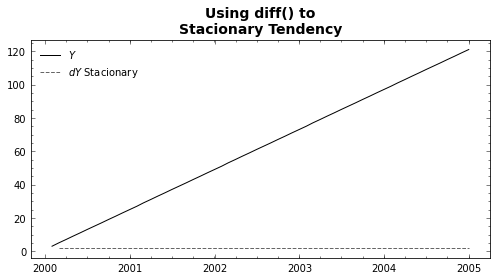

In [ ]:
df = tspsimulate(beta_0=1, beta_1=2, noise=0, seasons_month_len=1)
df['dY'] = df['Y'].diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$d Y$ Stacionary',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY']]")

O mesmo vale para polinômios de ordem superior empregando-se diferenças de ordem maior. Se tomarmos a série:

$$ Y_t =  \beta_0 + \beta_1 t + \beta_2 t^2 $$

Podemos empregar uma série de diferenças de ordem 2:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t +  \beta_2 t^2) -  (\beta_0 + \beta_1 (t-1)  + \beta_2 (t-1)^2) $$
$$ = \beta_1 - \beta_2 + 2 \beta_2 t $$

Como $\Delta Y_t$ é linear, sabemos que aplicando novamente a essa série de diferenças obteremos uma série de valor constante: 

$$ \Delta^2 Y_t = \Delta Y_t -  \Delta Y_{t-1} $$
$$ = (\beta_1 - \beta_2 + 2 \beta_2 t) - (\beta_1 - \beta_2 + 2 \beta_2 (t-1)) $$
$$ = 2 \beta_2 $$


In [ ]:
#@markdown Se tiver interesse empregamos o SymPy para resolução dessas equações aqui. 
from sympy import *
from IPython.display import display, Math, Latex
Y_t, Y_t_1, dY_t, dY_t_1, d2Y_t, b_0, b_1, b_2, t = symbols('Y_t Y_t_1 dY_t dY_t_1 d2Y_t b_0 b_1 b_2 t')

Y_t = b_0 + b_1 * t + b_2 * t ** 2
Y_t_1 = b_0 + b_1 * (t-1) + b_2 * (t-1) ** 2
dY_t = expand(Y_t - Y_t_1)
display(Eq(S('dY_t'), dY_t ))

dY_t_1 = expand(b_1 + 2*b_2*(t-1) - b_2)
display(Eq(S('dY_t_1'), dY_t_1 ))

d2Y_t = expand(dY_t - dY_t_1)
display(Eq(S('d2Y_t'), d2Y_t))

Eq(dY_t, b_1 + 2*b_2*t - b_2)

Eq(dY_t_1, b_1 + 2*b_2*t - 3*b_2)

Eq(d2Y_t, 2*b_2)

,Y,dY,d2Y
2000-01-31,3.0,NaN,NaN
2000-02-29,8.0,5.0,NaN
2000-03-31,19.0,11.0,6.0
2000-04-30,36.0,17.0,6.0
2000-05-31,59.0,23.0,6.0


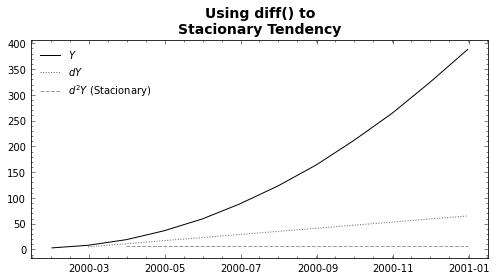

In [ ]:
df = tspsimulate(beta_0=1, beta_1=2, beta_2=3, noise=0, seasons_month_len=1,nr_months=12)
df['dY'] = df['Y'].diff()
df['d2Y'] = df['Y'].diff().diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$dY$',linestyle='dotted',ax=ax)
tspplot(df['d2Y'],label='$d^2Y$ (Stacionary)',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY','d2Y']]")

Felizmente para a maior parte dos casos práticos, mesmo séries complexas como séries financeiras e econômicas, a aplicação de uma ou duas ordens de diferenças é suficiente para você obter a estacionariedade da série.



## Série do Logaritmo

Uma série de diferenças elimina uma tendência linear para séries aditivas e exponencial para séries multiplicativas, e séries de diferenças de ordem maior podem ser utilizadas para séries com tendência polinomial. Mas o que dizer das séries de tendência exponencial encontradas na maior parte das séries econômicas e de preços. Para isso empregamos a transformação logarítmica da série para, em seguida, aplicarmos diferenças.



Note que, se $Y_t$ tem apenas tendência exponencial ela é uma série da forma:

$$ Y_t = \beta_0 + \beta_1 ^ {t} $$

e portanto, 

$$ \ln Y_t = \ln \beta_0 \ln \beta_1 ^ {t} $$
$$=\ln \beta_0 \ln \beta_1  \times {t} = \beta_0' \times t $$

sendo a série $\ln Y_t$ linear ela pode ser tornada estacionária aplicando-se uma única transformação de diferenças.

$$ \Delta \ln Y_t = \beta_0' \times t $$

É por isso que no tratamento de várias séries econômicas e de preços aplicamos frequentemente a transformação logarítmica, o que se aplica para obtermos a estacionariedade de séries temporais, e é ainda bastante comum na aplicação de modelos de regressão linear. 

,Y,dY,d2Y,dlogY
2000-01-31,20.085537,NaN,NaN,NaN
2000-02-29,33.115452,13.029915,NaN,0.5
2000-03-31,54.598150,21.482698,8.452783,0.5
2000-04-30,90.017131,35.418981,13.936283,0.5
2000-05-31,148.413159,58.396028,22.977047,0.5


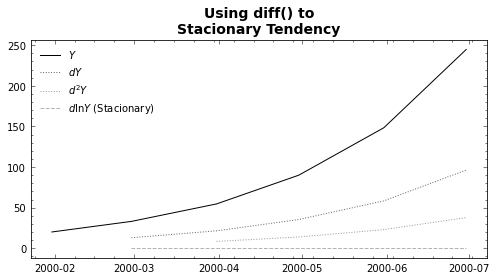

In [ ]:
df = tspsimulate(beta_0=1, beta_1=0.5, noise=0, seasons_month_len=1,nr_months=6)
df['Y'] = np.exp(df['Y']) # adaptado para produzir uma série exponencial  
df['dY'] = df['Y'].diff()
df['d2Y'] = df['Y'].diff().diff()
df['dlogY'] = np.log( df['Y'] ).diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$dY$',linestyle='dotted',ax=ax)
tspplot(df['d2Y'],label='$d^2Y$',linestyle='dotted',ax=ax)
tspplot(df['dlogY'],label='$d \ln Y$ (Stacionary)',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY','d2Y','dlogY']]")

O gráfico anterior mostra que a série exponencial se torna estacionária ao aplicarmos a diferença ao log dos valores.

## Aplicando as Transformações a Séries Reais

Podemos aplicar esses procedimentos a nossas séries exemplo do começo do capítulo. Como você pode ver as séries `gas_consumption` e `google_trends_tesla` não são estacionárias. Mas enquanto `gas_consumption` tem uma tendência linear, `google_trends_tesla` tem um comportamento exponencial. Desse modo aplicamos apenas a transformação de diferenças a  `gas_consumption`, enquanto para `google_trends_tesla` aplicamos a diferença para os valores de $\ln$ da série. Em ambos os casos foi suficiente aplicarmos a diferença de ordem $1$ para obtermos a estacionariedade. 

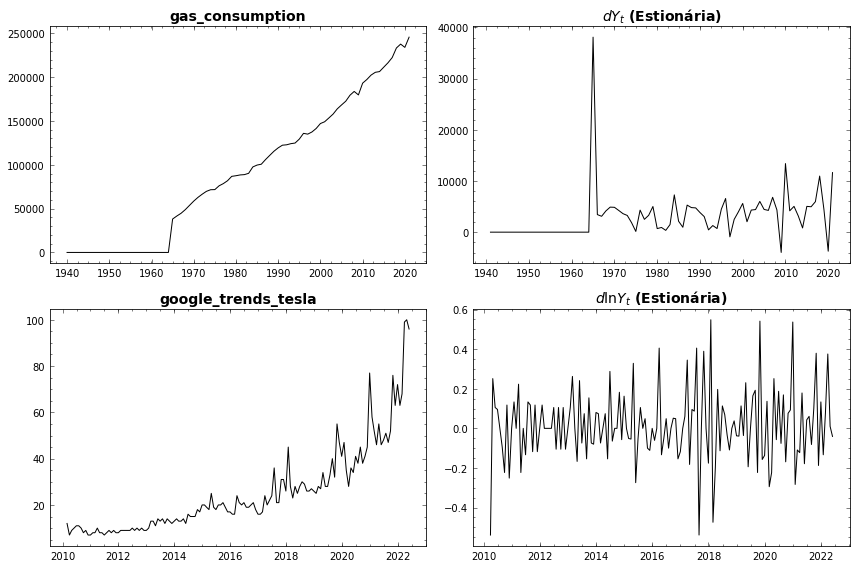

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fname = 'gas_consumption.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)
tspplot(df['gas_consumption'], title=fname.split('.csv')[0], ax=ax[0,0])
tspplot(df['gas_consumption'].diff(), ax=ax[0,1], title='$d Y_t$ (Estionária)')

fname = 'google_trends_tesla.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)
tspplot(df['Tesla'], title=fname.split('.csv')[0], ax=ax[1,0])
tspplot(np.log(df['Tesla']).diff(), ax=ax[1,1], title='$d \ln Y_t$ (Estionária)')


> **Note que na Série 'estacionária' produzida a partir de `gas_consumption` há um 'pico'. A série é estacionária? Na verdade, maior parte dos casos reais dificilmente você irá obter uma série 'totalmente estacionária'. Assim precisamos *relaxar* nossas condições e buscar uma série 'suficientemente estacionária', o que deverá servir para a maior parte dos propósitos. A estacionariedade prática que podemos alcançar é limitar os valores da Série a um intervalo suficientemente pequeno.**  

## Fazendo Ajuste e Previsões das Séries

Você deve estar se perguntando: mas como essas transformações poderiam me ajudar a fazer previsões? 

Nós decompomos as séries em tendência, sazonalidade e resíduos, e nosso objetivo é de capturar os comportamentos de tendência e sazonalidade das séries para fazer previsões. Lembre-se que o resíduo é a componente aleatória da série e que não conseguimos capturar. Neste capítulo vamos apenas em capturar a tendência das séries para fazer previsões, e você poderá entender como empregamos as transformações anteriores para isso.  

Nós sempre assumimos que a série (e aqui estamos nos referindo unicamente à tendência) tem um certo comportamento, por exemplo, um comportamento linear ou exponencial:

$$ Y_t =  \beta_0 + \beta_1 t  $$

ou

$$ Y_t =  e^{\beta_0 + \beta_1 t}  $$, onde $e$ é base exponencial.

O que queremos é encontrar os valores dos coeficientes que melhor ajustam os dados da nossa série. As transformações anteriores podem ser empregadas para nos ajudar nisso. 




Em ambos os casos podemos empregar a série de diferenças $dY_t$ para obter uma média de seus valores e, portanto, uma estimativa para o coeficiente $\beta_1$. O valor de $\beta_0$ é um valor inicial da série. Obtemos então as estimativas:

$$ \hat{Y}_t =  \hat \beta_0 + \hat \beta_1 t   = Y_0 + \frac{1}{n} \sum dY_t t$$

ou, no caso exponencial:

$$ \hat{Y}_t =  e^{\hat \beta_0 + \hat \beta_1 t }  = e^{ \ln Y_0 + \frac{1}{n} \sum d \ln Y_t t}$$

Lembrando que, neste caso, empregamos a diferença do $\log$ da série original.

,Y_hat
2004-12-31,134.783760
2005-01-31,136.637577
2005-02-28,138.491394
2005-03-31,140.345211
2005-04-30,142.199028


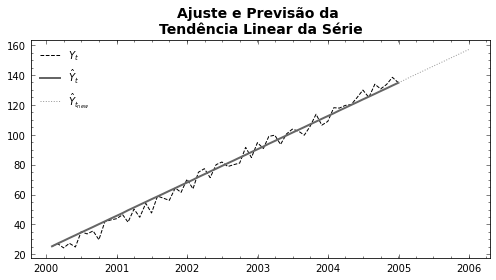

In [ ]:
df = tspsimulate(beta_0=1, beta_1=2, seasons_month_len=1)

def forecast_linear(df, steps_ahead = 1, freq='M', title='Ajuste e Previsão da \nTendência Linear da Série'):
  df = df.copy()
  df.columns = ['Y']
  df['t'] = np.arange(0,len(df))

  df['dY'] = df['Y'].diff()
  df['Y_hat'] = df[df.t == 0]['Y'][0] + df['dY'].mean() * df['t']

  fig, ax = plt.subplots()
  tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
  tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)

  forecast = pd.DataFrame()
  forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
  forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1,freq=freq)
  forecast['Y_hat'] = df[df.t == 0]['Y'][0] + df['dY'].mean() * forecast['t']

  tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_{t_{new}}$',linestyle='dotted',title=title)

  return forecast 

forecast = forecast_linear(df[['Y']], steps_ahead = 12)
tspdisplay("forecast[['Y_hat']]")


,Y_hat
2000-12-31,1152.262078
2001-01-31,1523.559701
2001-02-28,2014.501915


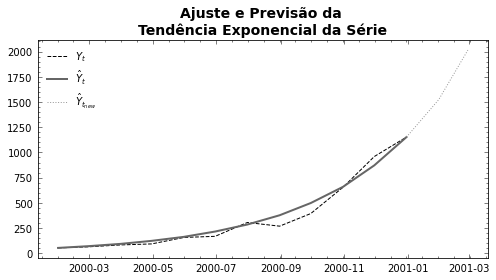

In [ ]:
df = tspsimulate(beta_0=1, beta_1=0.3, seasons_month_len=1, nr_months=12)
df['Y'] = np.exp(df['Y']) # adaptado para produzir uma série exponencial 

def forecast_exponencial(df, steps_ahead = 1, freq='M', title='Ajuste e Previsão da \nTendência Exponencial da Série'):
  df = df.copy()
  df.columns = ['Y']
  df['t'] = np.arange(0,len(df))
  
  df['dY'] = np.log(df['Y']).diff()
  df['Y_hat'] = np.exp(np.log(df[df.t == 0]['Y'][0]) + df['dY'].mean() * df['t'])

  fig, ax = plt.subplots()
  tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
  tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)

  forecast = pd.DataFrame()
  forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
  forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1, freq=freq)
  forecast['Y_hat'] = np.exp(np.log(df[df.t == 0]['Y'][0]) + df['dY'].mean() * forecast['t'])

  tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_{t_{new}}$',linestyle='dotted',title=title)

  return forecast 

forecast = forecast_exponencial(df[['Y']], steps_ahead = 2)
tspdisplay("forecast[['Y_hat']]")


Esse procedimento pode ser aplicado para o ajuste e a previsão da tendência das nossas séries reais, por exemplo, `gas_consumption` e `google_trends_tesla`.

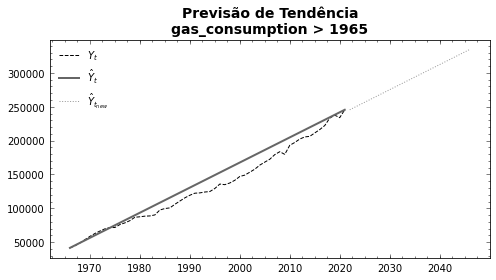

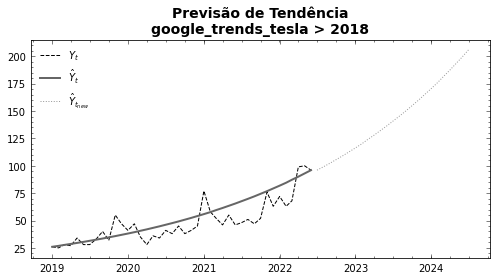

In [ ]:
fname = 'gas_consumption.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

forecast = forecast_linear(df[ df.index.year > 1965 ][['gas_consumption']], 
                           steps_ahead = 24, 
                           freq='Y',
                           title='Previsão de Tendência\ngas_consumption > 1965')

fname = 'google_trends_tesla.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

forecast = forecast_exponencial(df[ df.index.year > 2018 ][['Tesla']], 
                                steps_ahead = 24, 
                                title='Previsão de Tendência\ngoogle_trends_tesla > 2018')
print()

Ao fazer a previsão, ou *forecasting*, para valores futuros da série, você pode observar a tendência e verificar, por exemplo, que dados mais antigos têm uma influência menor no comportamento mais recente da série (e excluindo ciclos). Uma previsão melhor, pode ser obtida em muitos casos fazendo-se um ajuste da série somente a um intervalo mais recente. Assim, nos exemplos anteriores, empregamos somente dados a partir de 1965 para `gas_consumption` para fazermos o ajuste e a previsão de novos casos, excluindo um período de estabilidade das décadas de 50 e 60 que não refletia o movimento mais recente da série. Para a série `google_trends_tesla` empregamos somente dados a partir de 2018, capturando o comportamento exponencial mais recente da série. 



Como você pode ver os modelos se *ajustam* bastante bem os valores já conhecidos da série e podem, então, ser empregados para a previsão de novos valores. 

Veja a seguir esse mesmo procedimento empregado nas séries reais `gas_consumption` e `google_trends_tesla`. Note que ainda estamos trabalhando com séries que não possuem sazonalidades, mas apenas um comportamento de tendência a ser capturado.



Os cálculos anteriores podem ser bastante mais complexos a depender do modelo empregado, mas o princípio de funcionamento é basicamente o mesmo: buscamos estimar os melhores parâmetros de um modelo aos nossos dados. Aqui, e na seção que segue sobre sazonalidade, empregamos métodos simples de média para estimar esses parâmetros e modelos mais elaborados como empregaremos a partir do próximo capítulo, empregam em *métodos de mínimos quadrados* para a estimativa dos parâmetros. Nosso modelo linear para a tendência poderia, por exemplo, ser estimado do mesmo modo por uma regressão linear que encontra nos *métodos de mínimos quadrados* a sua solução mais geral.

> **Felizmente todos esses cálculos podem ser feitos com o uso de `pacotes`, como o pacote estatístico `statsmodels`. É como implementaremos a decomposição e previsões de séries temporais a partir do próximo capítulo. Mas aqui, por hora, nosso interesse é entender os princípios por trás das operações que serão realizadas e, por isso, estamos fazendo aqui as operações diretamente, '*by scratch*', e você não precisa necessariamente se preocupar com todas as implementações, mas apenas com seus princípios.**

## Modelo Auto Regressivo

Ao final você nota que o que fizemos foi estimar uma tendência $\hat{T}$ para os dados. O procedimento de empregar a média das diferenças é na verdade um método muito simples e muitos outros métodos podem ser aplicados. Mas todos seguem mais ou menos o mesmo princípio. Trabalhar com as diferenças ou estimar a regressão linear $\hat{T} = \beta_0 + \beta_1 t$ é o mesmo que empregarmos a média das diferenças. Outro método particularmente importante é o que emprega a estimativa dos valores com base nos valores anteriores, ou termos regressivos da série. Por exemplo, uma série apenas com tendência linear, pode ser escrita como:

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1}$$

Note que agora não estamos obtendo $Y_{t}$ em função de $t$ como antes, $ Y_t = \beta_0 + \beta_1 t $, mas em função do valor imediatamente anterior, e que chamamos de ordem 1. Se empregamos a série de diferenças obtemos o mesmo resultado anterior,

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta^{'}_0 + \beta^{'}_1 Y_{t-1}) -  (\beta^{'}_0 + \beta^{'}_1 Y_{t-2}) $$

Que sendo uma série linear em $t$ pode ser escrita como:

$$ = (\beta^{'}_0 + \beta^{'}_1 ( \beta_0 + \beta_1 ( t - 1) )) -  (\beta^{'}_0 + \beta^{'}_1 ( \beta_0 + \beta_1 (t - 2) )) = \beta_1 $$

Em resumo, para aproximar nosso modelo podemos estimar os parâmetros da regressão: 

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1}$$

E chegarmos nos mesmos resultados que tivemos com o uso da série de diferenças. Os modelos AR, ARMA, ARIMA e SARIMAX, estão entre os modelos mais populares empregados para Séries e fazem uso dessa ideia de empregar termos regressores (anteriores) para a estimativa de valores futuros das Séries.







A função `shift()` que vimos no *Quick Start* é útil para podermos obter os valores defasados, isto é, em $t-1, t-2, ..., t-n$ de uma série.

In [ ]:
df = tspsimulate(beta_0=1, beta_1=2, seasons_month_len=1)
df = df[['t','Y']].copy()

df['Y_t-1'] = df['Y'].shift()

tspdisplay('df')

,t,Y,Y_t-1
2000-01-31,0,23.105039,NaN
2000-02-29,1,26.281764,23.105039
2000-03-31,2,22.142650,26.281764
2000-04-30,3,27.787169,22.142650
2000-05-31,4,26.508590,27.787169


Considerando um modelo unicamente linear da Série podemos estimar os parâmetros do modelo com o regressor linear. Vamos empregar `LinearRegression` da popular biblioteca `skit-learn` para estimar os coefientes da regressão.

In [ ]:
from sklearn.linear_model import LinearRegression

df_notna = df.dropna().copy()

m = LinearRegression()
m.fit(np.array(df_notna['Y_t-1']).reshape(-1, 1),df_notna['Y'])

print( m.coef_[0] )
print( m.intercept_ )

0.9916621571849666
2.580672875185684


Empregamos agora esses coeficientes para estimar os valores da série $\hat{Y}_t$, considerando apenas a sua tendência.

In [ ]:
Y_hat = [ ]
Y_hat0 = df[ df.t == 0]['Y'][0]
Y_hat.append(Y_hat0)

for i in range(1,len(df)):
  Y_hat0 = m.intercept_ + m.coef_[0] * Y_hat0
  Y_hat.append(Y_hat0)

df['Y_hat'] = Y_hat

tspdisplay('df')

,t,Y,Y_t-1,Y_hat
2000-01-31,0,23.105039,NaN,23.105039
2000-02-29,1,26.281764,23.105039,25.493066
2000-03-31,2,22.142650,26.281764,27.861181
2000-04-30,3,27.787169,22.142650,30.209552
2000-05-31,4,26.508590,27.787169,32.538342


In [ ]:
forecast = pd.DataFrame()
steps_ahead = 12
forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1, freq='M')

Y_hat = [ ]
Y_hat0 = df[ df.t == df.t.max() ]['Y_hat'][0]
Y_hat.append(Y_hat0)

for i in range(1,len(forecast)):
  Y_hat0 = m.intercept_ + m.coef_[0] * Y_hat0
  Y_hat.append(Y_hat0)

forecast['Y_hat'] = Y_hat


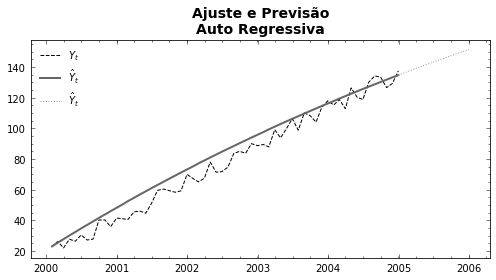

In [ ]:
fig, ax = plt.subplots()

tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)
tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_t$',linestyle='dotted',alpha=0.5,title='Ajuste e Previsão\nAuto Regressiva')

Podemos considerar também modelos de mais alta ordem,

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1} + \beta^{'}_2 Y_{t-2} + \dots + \beta^{'}_n Y_{t-n}$$

Esse modelo é conhecido como modelo Auto Regressivo, AR, pois considera a correlação entre a os diferentes valores da própria variável nos tempos anteriores. A *janela* de termos anteriores, $[t-1, t-n]$, é conhecida como *lag*. Esse é um modelo mais geral que o modelo anterior, e a base de muitos modelos que você aprenderá nos próximos capítulos.


# Sazonalidade

Até agora empregamos apenas séries com tendência. Mas um grande número de séries importantes apresenta também comportamentos sazonais. Embora possa haver séries sazonais sem uma tendência (na verdade o mais correto é dizer que a tendência é estacionária), vamos tratar do caso mais geral, em que encontramos tanto tendências como sazonalidade, e verificar, do mesmo modo como fizemos antes para tendência, como podemos decompor essa série e extrair suas características para fazer predições. Vamos começar empregando nossa série simulada `simulate_ts1` que possui sazonalidade e uma tendência linear. 

In [ ]:
df = tspsimulate(seasons_month_len=12)

## Retirando a Tendência

É claro que uma inspeção visual inicial da série é útil para identificarmos possíveis sazonalidades e vamos ver alguns gráficos e técnicas úteis para isso. Mas um primeiro passo aqui será você extrair a tendência da série para que possamos observar a série *limpa* de tendências e, portanto, observar a série somente em sua sazonalidade e resíduos. Podemos fazer isso empregando o método das diferenças que vimos antes, e retirando a tendência estimada da série original. 

In [ ]:
df.head()

,t,Y,T,S,R
2000-01-31,0,11.057163,1,0.000000,4.028581
2000-02-29,1,25.610583,3,6.000000,10.582002
2000-03-31,2,31.904919,5,10.392305,10.484032
2000-04-30,3,36.878808,7,12.000000,11.850227
2000-05-31,4,34.010870,9,10.392305,8.589984


In [ ]:
df['dY'] = df['Y'].diff()
df['Y_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']

df['Y-T_hat'] = df['Y'] - df['Y_hat']

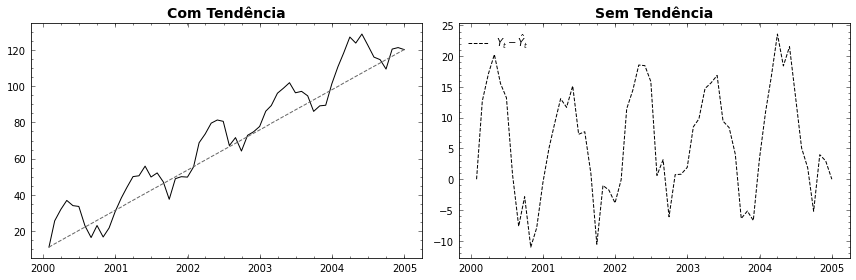

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

tspplot(df['Y'], ax=ax[0], title='Com Tendência')
# tspplot(df['Y'], label='$Y$', ax=ax[0], title='Com Tendência')
tspplot(df['Y_hat'], ax=ax[0], linestyle='dashed')
# tspplot(df['Y_hat'], label='$Y_hat$', ax=ax[0], linestyle='dashed')

tspplot(df['Y-T_hat'], label='$Y_t- \hat{Y}_t$', ax=ax[1], linestyle='dashed', title='Sem Tendência')

Lembre-se que consideramos basicamente dois tipos de séries, as *aditivas* e as *multiplicativas*. Obtemos assim a série sem tendências:

$$ Y_t - \hat{T}_t = S_t + R_t $$

Se a série tem composição aditiva, e:

$$ Y_t  /  \hat{T}_t = S_t \times R_t $$

se a série tem composição multiplicativa. 

No exemplo, nossa série é aditiva, e empregamos $ Y_t - \hat{T}_t = S_t + R_t $ para obter uma série sem tendência. Na nova série obtida é mais fácil identificar as sazonalidades e, a exemplo do que fizemos com a série de diferenças obtida da série original, vamos empregar esta série derivada para extrair o comportamento sazonal da série original. A nova série é composta somente da sazonalidade e da parte que não temos como extrair o comportamento, isto é, os seus resíduos.

## Identificando a Periodicidade

Existem várias visualizações de dados úteis para identificarmos periodicidades, ou comportamentos sazonais das séries. Um caso frequente é o das séries com dados mensais e podemos fazer gráficos dos valores de cada mês, de cada trimestre ou de cada semestre, para buscar identificar sazonalidades mensais, trimestrais ou semestrais. 

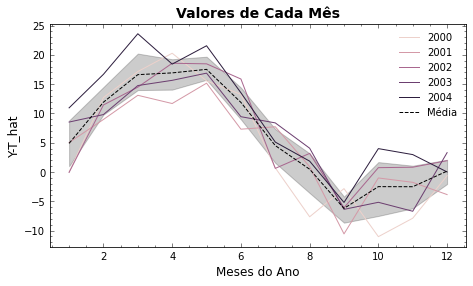

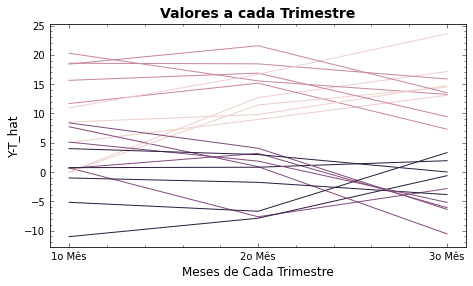

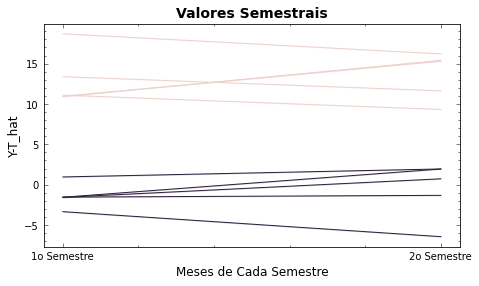

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['quarter_seq'] = [ ( x % 3 if x % 3 != 0 else 3 ) for x in df['month'] ]

df['semester'] = 1 + (df.index.month > 6)
df['semester_seq'] = [ ( x % 2 if x % 2 != 0 else 2 ) for x in df['month'] ]

df['day'] = df.index.dayofweek  # the x-axis (freq)
# df['week'] = df.index.week  # the seasonal period (period)

df['dayofyear'] = df.index.dayofyear

from matplotlib.lines import Line2D

fig, ax = plt.subplots()  
ax = sns.lineplot(x='month',y='Y-T_hat',hue='year',data=df,ci=False,ax=ax,legend=True)
ax = sns.lineplot(x='month',y='Y-T_hat',data=df,ax=ax,color='k',label='Média',linestyle='dashed')
plt.title('Valores de Cada Mês')
plt.xlabel('Meses do Ano')
plt.legend()
plt.show()

fig, ax = plt.subplots() 
for year in df['year'].unique():
  ax = sns.lineplot(x='quarter_seq',y='Y-T_hat',hue='quarter',data=df[ df.year == year ],ci=False,ax=ax,legend=False)
plt.xticks(ticks=np.arange(1,4,1),labels=['1o Mês','2o Mês','3o Mês'])
plt.xlabel('Meses de Cada Trimestre')
plt.title('Valores a cada Trimestre')
plt.show()

fig, ax = plt.subplots()
for year in df['year'].unique():
  ax = sns.lineplot(x='semester_seq',y='Y-T_hat',hue='semester',data=df[ df.year == year ],ci=False,ax=ax,legend=False)

plt.xticks(ticks=np.arange(1,3,1),labels=['1o Semestre','2o Semestre'])
plt.xlabel('Meses de Cada Semestre')
plt.title('Valores Semestrais')
plt.show()

Note que é mais fácil identificar o padrão de sazonalidade nesses gráficos se a série é estacionária com relação à tendência. Caso contrário os valores de cada mês, trimestre ou semestre apareceriam em nível diferentes de acordo com a tendência da série. 

Fica evidente no exemplo um comportamento mensal dos dados, um padrão que é seguido mais ou menos ao longo dos meses do ano. 

Uma outra forma de entendermos a periodicidade é entender que os valores da série encontram-se em uma mesma faixa de valores para um mesmo ponto do período da série. 

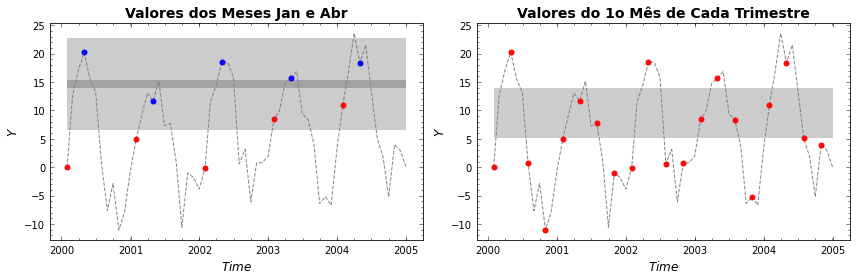

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax[0].plot(df[ (df['year'] == year) & (df['month'] == 1) ].index,df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
  ax[0].plot(df[ (df['year'] == year) & (df['month'] == 4) ].index,df[ (df['year'] == year) & (df['month'] == 4) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax[0].hlines(df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
ax[0].hlines(df[ (df['year'] == year) & (df['month'] == 4) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

ax[0].set_title('Valores dos Meses Jan e Abr')
ax[0].set_ylabel('$Y$')
ax[0].set_xlabel('$Time$')

ax[1].plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax[1].plot(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ].index,df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
#   ax.plot(df[ (df['year'] == year) & (df['quarter'] == 3) ].index,df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax[1].hlines(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
# ax.hlines(df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

ax[1].set_title('Valores do 1o Mês de Cada Trimestre')
ax[1].set_ylabel('$Y$')
ax[1].set_xlabel('$Time$')

plt.tight_layout()
plt.show()

Assim, podemos ver que os valores dos meses de Jan e Abr se *repentem* dentro de uma mesma faixa de valores a cada ano, mas o mesmo não ocorre para o primeiro mês de cada trimestre. 

Procedimentos análogos também podem ser empregados para buscar sazonalidades semanais ou quinzenais em séries diárias, ou horárias, 12h ou 6h, para séries horárias etc. Esses são casos bastante comuns e dão conta de uma série de situações práticas da maior parte das séries temporais empregadas no dia a dia das engenharias e séries econômicas. Mas há casos mais complexos em que podemos não fazer qualquer ideia da periodicidade, como no caso dos ciclos solares que são de 11 anos. Para isso pode ser útil o periodograma. 

## Periodograma

O periodograma é empregado particularmente em séries de dados das áreas de ciências em que os períodos, diferentemente dos fenômenos financeiros e comerciais, regidos muitas vezes por sazonalidades do comportamento humano, podem apresentar períodos muito variados de sazonalidade. O periodograma se baseia em fazer uma análise do *spectro* (a totalidade da faixa de valores) das frequências (o inverso do período) da série, e apresenta em diferentes níveis os períodos mais frequentemente encontrados. 

,frequencies,spectrum,periods
5,5.0,64.508385,12.0
1,1.0,2.530738,60.0
8,8.0,2.243994,7.5
2,2.0,1.024887,30.0
12,12.0,1.024393,5.0


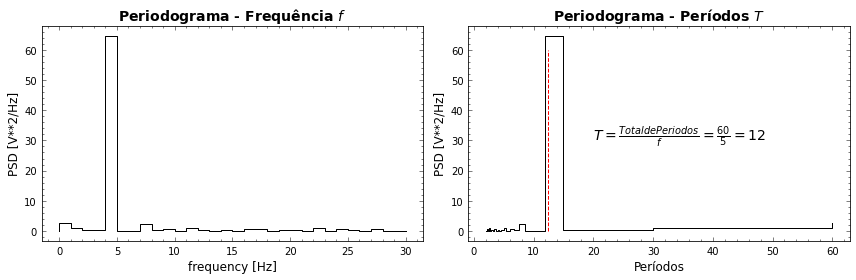

In [ ]:
from scipy import signal

fig, ax = plt.subplots(1,2, figsize=(12,4))

frequencies, spectrum = signal.periodogram(df['Y-T_hat'],fs=len(df)) 

# the same can be done here:
# frequencies, spectrum = signal.periodogram(df['Y'],fs=12,detrend='linear') 

ax[0].step(frequencies, spectrum)

ax[0].set_title('Periodograma - Frequência $f$')
ax[0].set_xlabel('frequency [Hz]')
ax[0].set_ylabel('PSD [V**2/Hz]')
 
dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum  
dfft['periods'] = len(df) / dfft['frequencies']
display(dfft.sort_values('spectrum',ascending=False).head())

ax[1].step(dfft.periods, dfft.spectrum)

ax[1].set_title('Periodograma - Períodos $T$')
ax[1].set_xlabel('Períodos')
ax[1].set_ylabel('PSD [V**2/Hz]')

ax[1].vlines(12.5,0,60,linestyle='dashed',color='r')
ax[1].text(20,30,'$T = \\frac{ Total de Periodos }{f} = \\frac{60}{5} = 12$', fontsize=14)

plt.tight_layout()
plt.show()




No caso da nossa série a periodicidade mensal é a única relevante. Há casos em que pode haver múltiplas peridodicidades ao mesmo tempo em uma série. Mas não empregaremos séries como essas aqui.

O periodograma encontra mais aplicação na ciência e em aplicações mais complexas onde, em geral, uma análise no domínio da frequência é feito. Nosso propósito aqui está principalmente em uma análise das séries no domínio do tempo e para implementação de modelos como o ARIMA, em geral, são empregadas outras técnicas (como o ACF e PACF) para a determinação das sazonalidades. 

## Estimando a Sazonalidade pelos Valores Médios

Do mesmo modo que modelamos o comportamento médio da tendência da série podemos agora empregar valores médios de cada período da sazonalidade da série sem tendência para fazermos estimativas da sazonalidade.

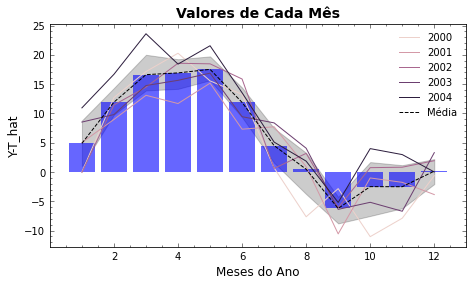

In [ ]:
fig, ax = plt.subplots()  
ax = sns.lineplot(x='month',y='Y-T_hat',hue='year',data=df,ci=False,ax=ax,legend=True)
plt.bar(x=df.groupby('month')['Y-T_hat'].mean().index,height=df.groupby('month')['Y-T_hat'].mean().values,color='b',alpha=0.6)
ax = sns.lineplot(x='month',y='Y-T_hat',data=df,ax=ax,color='k',label='Média',linestyle='dashed')
plt.title('Valores de Cada Mês')
plt.xlabel('Meses do Ano')
plt.legend()
plt.show()

Como identificamos uma sazonalidade mensal, obtemos os valores médios de cada mês em cada ano, isto é, o valor médio de Jan para todos os anos da série, o valor médio de Fev para todos os anos da série, e assim sucessivamente. Esses valores permitem reproduzir o comportamento médio da sazonalidade da série.

> **Atenção: não confunda esses valores médios empregados para capturar a sazonalidades com o conceito de médias móveis que você verá mais adiante. Esse é um erro bastante comum que se faz.** 

In [ ]:
df.groupby('month')['Y-T_hat'].mean() 

month
1      4.882645
2     11.917738
3     16.613000
4     16.914693
5     17.518087
6     11.874454
7      4.502917
8      0.466752
9     -6.219194
10    -2.503781
11    -2.518825
12     0.145864
Name: Y-T_hat, dtype: float64

Podemos então reconstruir a série sazonal e verificar o ajuste que o uso das médias fornece.

In [ ]:
df_S_hat = pd.DataFrame( df.groupby('month')['Y-T_hat'].mean() ).reset_index()
df_S_hat.rename(columns = {'Y-T_hat':'S_hat'},inplace=True)
# df_S_hat
df = df.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df.index.name = ''
# df.head()

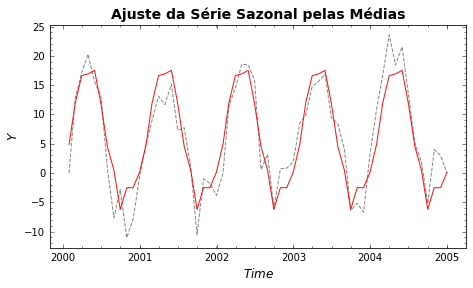

In [ ]:
fig, ax = plt.subplots() 

ax.plot(df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df['S_hat'],alpha  = 0.95, color='red' )

plt.title('Ajuste da Série Sazonal pelas Médias')
plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

## Reconstruindo a Série Original

Você pode, finalmente, empregar agora as decomposições de tendência e sazonalidade para reconstruir a série original. Lembrando que nossa Série é Aditiva o que precisamos é somar as componentes obtidas de Tendência e Sazonalidade. O Resíduo não aparece pois ele é a parte não modelada e irá corresponder a um *erro* entre os valores estimados e os valores reais da série.

In [ ]:
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
df['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']
df['Y_hat'] = df['T_hat'] + df['S_hat']

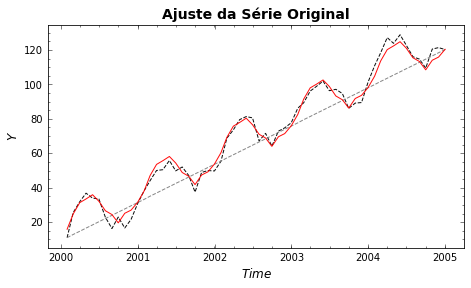

In [ ]:
fig, ax = plt.subplots() 

ax.plot(df['Y'],alpha  = 0.95, color='k' , linestyle='dashed')
ax.plot(df['T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df['Y_hat'],alpha  = 0.95, color='red' )

plt.title('Ajuste da Série Original')
plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

## Previsão

Seguros do ajuste da nossa série e da distribuição dos erros, você pode empregar agora o modelo para fazer previsões de novos valores, ou valores futuros.

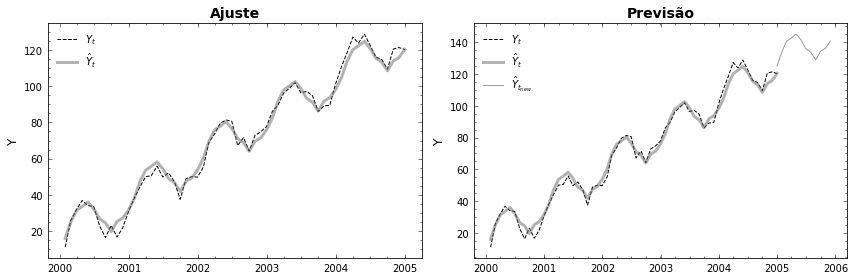

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.lineplot(x=df.index, y=df['Y'], ax=ax[0], label='$Y_t$',linestyle='dashed')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[0], label='$\hat{Y}_t$',lw=3,alpha=0.5)

ax[0].set_title('Ajuste')

forecast = pd.DataFrame()
forecast.index = pd.date_range(start=df.index.max(), periods=12, freq='M')
forecast['t'] = np.arange(len(forecast)) + df['t'].max()
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
forecast['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * forecast['t']
forecast['Y_hat'] = forecast['T_hat'] + df.iloc[0:12]['S_hat'].values

# display(df.tail())
# display(forecast)
sns.lineplot(x=df.index, y=df['Y'], ax=ax[1], label='$Y_t$',linestyle='dashed')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[1], label='$\hat{Y}_t$',lw=3,alpha=0.5)
sns.lineplot(x=forecast.index, y=forecast['Y_hat'], ax=ax[1], label='$\hat{Y}_{t_{new}}$',linestyle='solid')


ax[1].set_title('Previsão')


plt.legend()
plt.tight_layout()
plt.show()


Os procedimentos para séries multiplicativas são também análogos e, embora tenhamos aplicado até aqui a uma série de dados sintética podemos igualmente aplicar a dados reais como a série de dados `pharma_sales`. 

In [ ]:
df_ts1 = df.copy()
forecast_ts1 = forecast.copy()

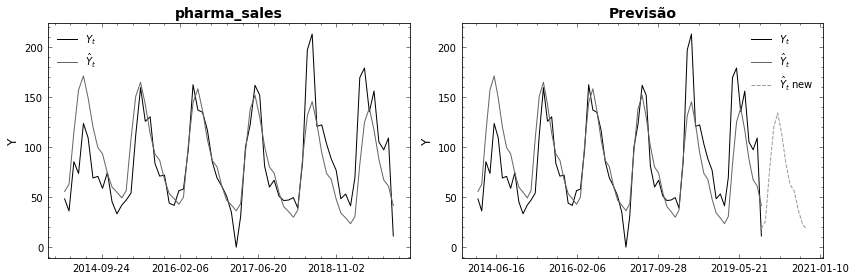

In [ ]:
fname = 'pharma_sales.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

df['Y'] = df['R06'] 

df['t'] = np.arange(len(df))
df['dY'] = df['Y'].diff()
df['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']
# display(df.head())
df['Y-T_hat'] = df['Y'] - df['T_hat']

df['month'] = df.index.month
df_S_hat = pd.DataFrame( df.groupby('month')['Y-T_hat'].mean() ).reset_index()
df_S_hat.rename(columns = {'Y-T_hat':'S_hat'},inplace=True)
# df_S_hat
df = df.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df.index.name = ''
# df.head()
df['Y_hat'] = df['T_hat'] + df['S_hat']

fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.lineplot(x=df.index, y=df['Y'], ax=ax[0], label='$Y_t$')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[0], label='$\hat{Y}_t$')
ax[0].set_title(fname.split('.csv')[0])
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))

forecast = pd.DataFrame()
forecast.index = pd.date_range(start=df.index.max(), periods=12, freq='M')
forecast['t'] = np.arange(len(forecast)) + df['t'].max()
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
forecast['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * forecast['t']
forecast['Y_hat'] = forecast['T_hat'] + df.iloc[0:12]['S_hat'].values

sns.lineplot(x=df.index, y=df['Y'], ax=ax[1], label='$Y_t$')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[1], label='$\hat{Y}_t$')
sns.lineplot(x=forecast.index, y=forecast['Y_hat'], ax=ax[1], label='$\hat{Y}_t$ new', linestyle='dashed')
ax[1].set_title('Previsão')
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.tight_layout()
plt.show()

Neste caso omitimos as análises, mas é fácil ver que os dados tem uma sazonalidade mensal e, embora não haja uma tendência acentuada ela também foi considerada para o ajuste da série e a previsão.

De qualquer modo é importante, para cada modelo, uma análise de métricas que indiquem a qualidade do modelo. É o que você vai entender a seguir com as  medidas de erro e a análise da distribuição dos resíduos.

# Resíduos

O termo resíduo pode ser empregado também para designar a diferença entre a série real e o ajuste que você obteve. É claro que você deseja um menor resíduo para o seu ajuste, pois você quer que a diferença entre a série real e o seu ajuste seja pequena. Por exemplo, se empregássemos um modelo linear para ajustar uma série com comportamento exponencial teríamos um erro maior do que empregar o modelo exponencial no ajuste. 

Essa diferença pode ser medida de diversas formas, mas todas refletem ao final as diferenças a série real $Y_t$ e os valores estimados $\hat Y_t$. Algumas dessas medidas por serem bastante empregadas recebem nomes especiais como:

* **MAE**, Erro Médio Absoluto (*Mean Absolute Error*)

$$R = \frac{1}{n} \sum | Y_t - \hat Y_t |$$

* **MSE**, Erro Médio Quadrático (*Mean Square Error*)

$$R = \frac{1}{n} \sum ( Y_t - \hat Y_t )^2$$

* **RMSE**, Raiz do Erro Médio Quadrático (*Root Mean Square Error*)

$$R = \sqrt{ \frac{1}{n} \sum ( Y_t - \hat Y_t )^2 } $$

Essas métricas são uma medida de qualidade do ajuste dos modelos e você pode empregá-las para decidir entre dois modelos diferentes qual se ajusta melhor aos dados. Esses valores podem ser facilmente calculados, mas a maioria dos pacotes irá fornecer esses valores automaticamente para você. 

In [ ]:
# calculate manually
r = df['Y'] - df['Y_hat']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 21.735969772256727
MSE: 848.3700423313528
RMSE: 29.126792517051253


## Distribuição dos Resíduos

Além dos valores dos resíduos é importante analisarmos também a sua distribuição ao longo da série. O que esperamos é a distribuição dos resíduos tenha uma distribuição aproximadamente normal.

> **O que esperamos é a distribuição dos resíduos tenha uma distribuição aproximadamente normal, evitando que erros maiores (ou menores) dependam do  intervalo que se examina da série temporal.**

Um análise normalmente empregada, além dessas métricas absolutas, está em se verificar a distribuição dos resíduos o que pode ser feito por um gráfico de distribuição ou ainda um `probplot()` que compara distribuições.

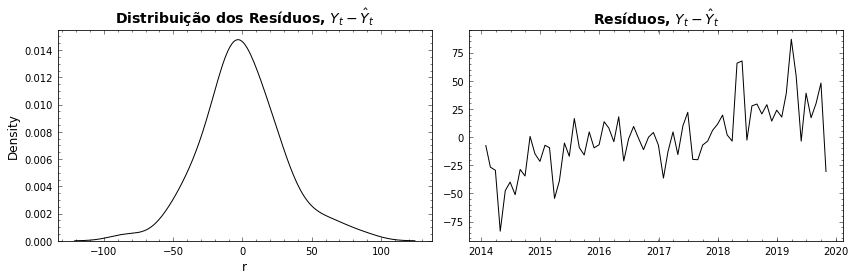

In [ ]:
df['r'] = r
fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(12,4))
    
sns.kdeplot(df['r'], ax=ax1)
ax1.set_title('Distribuição dos Resíduos, $Y_t - \hat{Y}_t$')
ax2.plot( df.index, df['r'])
ax2.set_title('Resíduos, $Y_t - \hat{Y}_t$')

plt.tight_layout()
plt.show()

Nossos resíduos apresentam uma distribuição normal, o que é o desejável, uma vez que não queremos que os erros tenham uma tendência na sua distribuição, por exemplo, para valores maiores ou menores. Isso pode ser verificado também empregando um plot comparando-se a distribuição dos valores com uma distribuição teórica normal. 

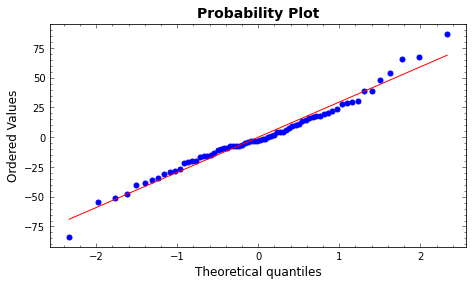

In [ ]:
from scipy import stats

plt.figure()
res = stats.probplot(df['r'], plot=plt)

Desvios com relação à diagonal indicariam desvios à distribuição normal dos erros.

# Intervalos de Confiança

Um ponto importante ao se fazer previsões é observarmos o *intervalo de confiança*, ou *IC*, dos valores previstos. Mesmo no ajuste da série os valores obtidos estão sujeitos a um intervalo de confiança. Por exemplo, se para quaisquer anos os valores do mês de Jan de uma série mensal apresenta sempre o mesmo valor, você terá mais confiança sobre a  estimativa do ajuste, do que se houverem vários diferentes valores, com uma variação (variância ou desvio padrão) muito grande. Assim, a variância (ou seu par, o desvio padrão) dos valores empregados para a sua estimativa, são um bom indicativo do intervalo de confiança da sua previsão. 

Aqui, podemos empregar o desvio padrão para estimar o intervalo de confiança. Ele vai indicar o intervalo em torno do qual estimamos encontrar os valores com uma probabilidade de 95% (esse é o valor usualmente empregado). Assim, você vai obter um intervalo de confiança maior ao longo do ajuste para intervalos de tempo com maior variação dos valores e, intervalos menores, quando a quantidade de valores diferentes (a variação) for menor. 

## IC das Previsões

Enquanto o IC do ajuste pode ser obtido apenas empregando-se os dados utilizados na estimativa da curva ajustada (para cada ponto, menos valores indicando um intervalo de confiança menor e, portanto, uma previsão melhor), para valores futuros não há um desvio padrão dos dados e precisamos trabalhar com o desvio das estimativas. 

A ideia, entretanto, é estimarmos o intervalo do mesmo modo que fizemos para os valores. Novamente existem diferentes técnicas que podem ser empregadas. Mas para os nossos propósitos é suficiente você entender que a cada novo período de previsão o intervalo de erro aumenta! Vamos entender isso: se você faz uma previsão para o período $t+1$ que já tem um erro, a previsão de mais um período $t+2$, sendo dependente do valor do período anterior estimado tende a aumentar o erro da previsão seguinte e assim sucessivamente. É o que chamamos de *propagação do erro*. Assim o IC, ou a *margem de erro*, aumenta a medida que nos distanciamos do período da série original. Uma forma comum de estimarmos esse intervalo é adicionarmos, a cada novo período, um intervalo de mesmo tamanho do intervalo de erro anterior.





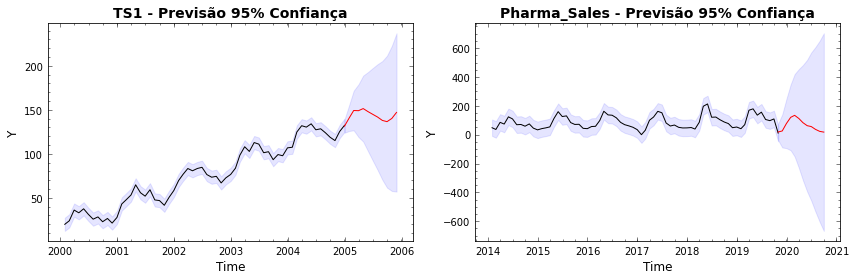

In [ ]:
# naive forecast from... 
# https://otexts.com/fpp2/prediction-intervals.html
df_pharma_sales = df.copy()
forecast_pharma_sales = forecast.copy()

df = df_ts1.copy()
df['r'] = df['Y'] - df['Y_hat']
forecast = forecast_ts1.copy()

RMSFE = np.sqrt(sum([x**2 for x in df['r']]) / len(df['r']))
band_size = 1.96*RMSFE

forecast['step'] = np.arange(1,len(forecast)+1)
forecast['band_size'] = forecast['step'] * band_size 

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(df.index, df['Y'], color='k', label='Valid')
# ax.scatter(df.index, df['Y_hat'])
ax[0].fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

ax[0].plot( forecast.index,forecast['Y_hat'],'r' )
ax[0].fill_between(forecast.index, (forecast['Y_hat']-forecast['band_size']), (forecast['Y_hat']+forecast['band_size']), color='b', alpha=.1)

ax[0].set_title("TS1 - Previsão 95% Confiança")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')

df = df_pharma_sales.copy()
df['r'] = df['Y'] - df['Y_hat']
forecast = forecast_pharma_sales.copy()

RMSFE = np.sqrt(sum([x**2 for x in df['r']]) / len(df['r']))
band_size = 1.96*RMSFE

forecast['step'] = np.arange(1,len(forecast)+1)
forecast['band_size'] = forecast['step'] * band_size 

ax[1].plot(df.index, df['Y'], color='k', label='Valid')
# ax.scatter(df.index, df['Y_hat'])
ax[1].fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

ax[1].plot( forecast.index,forecast['Y_hat'],'r' )
ax[1].fill_between(forecast.index, (forecast['Y_hat']-forecast['band_size']), (forecast['Y_hat']+forecast['band_size']), color='b', alpha=.1)

ax[1].set_title("Pharma_Sales - Previsão 95% Confiança")
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

Como você pode ver as estimativas ficam, a cada período com mais incerteza, o que é o esperado. É, de qualquer modo, uma análise essencial ao fazermos previsões. 

# Sumário

Aqui você pode entender importantes características das Séries Temporais, como:

* Tendência
* Sazonalidade
* Resíduos

E como essas características podem ser empregadas para modelar, decompondo e reconstruindo uma Série, pela adição ou multiplicação dessas componentes. Você aprendeu também o que é e como tornar uma série estacionária a partir de transformações. Por último, você viu como uma Série pode ser modelada com base em seus termos regressivos, isto é, seus valores em $t-1, t-2, ... , t-n$. Boa parte dos modelos que você verá a seguir são modelos que tentam aproximar uma série ou suas componentes por uma funçaõ desses fatores, 

$$ Y_t \approx f( Y_{t-1}, Y_{t-2}, ..., Y_{t-n})$$

conceito que terá um papel fundamental nos modelos que você verá a seguir.

# Para Saber Mais

Para uma introdução alternativa e matemática às Séries Temporais você pode buscar por:

* MORETTIN, Pedro A.; TOLOI, Clélia. **Análise de séries temporais.** In: Análise de séries temporais. 2006. p. 538-538.

O texto, entretanto, não está disponível online. 

<br>

Para um tratamento mais rigoroso, mas ainda acessível e disponível online, você pode acessar: 

* HYNDMAN, Rob J.; ATHANASOPOULOS, George. **Forecasting: principles and practice.** OTexts: Melbourne, Australia. OTexts.com/fpp2. Disponível em: https://otexts.com/fpp2/

Esse texto, entretanto, emprega bibliotecas `R` no lugar do `Python`, embora o tratamento estatístico seja o mesmo. 

<br>

Para uma abordagem prática de Séries Temporais em `Python` você pode buscar: 

* PEIXEIRO, Marco. **Time Series Forecasting in Python.** MEAP Edition. Disponível em: https://livebook.manning.com/book/time-series-forecasting-in-python-book/copyright-2022-manning-publications/v-5/3. 




